In [366]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

#### Veri seti linki Kaggle : https://www.kaggle.com/ronitf/heart-disease-uci

In [367]:
df = pd.read_csv("heart.csv")

In [368]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [369]:
df = df.rename(columns = {"age" : "Yas",
                           "sex" : "Cinsiyet", #1:Erkek 0:Kadın
                           "cp" : "GogusAgrisi",
                           "trestbps" : "KanBasinci",
                           "chol" : "Kolesterol",
                           "fbs" : "KanSekeri",   # kansekeri > 120 ise 1 degilse 0
                           "restecg" : "Elektrokardiyografik",
                           "thalach" : "KalpAtisHizi",
                           "exang" : "KalpAgrisi",  # 1 : evet, 0 : hayir
                           "oldpeak" : "ST", #  göğüs ağrısı sırasında olan ST depresyonu, ağrı geçtikten birkaç dakika sonra kaybolabilir.
                           "slope" : "STEgim",
                           "ca" : "RenklendirilenDamarSayi",
                           "target": "Sonuc"})  # 0 : Hastalik yok, 1 : Hastalik var

In [370]:
df.head()

,Yas,Cinsiyet,GogusAgrisi,KanBasinci,Kolesterol,KanSekeri,Elektrokardiyografik,KalpAtisHizi,KalpAgrisi,ST,STEgim,RenklendirilenDamarSayi,thal,Sonuc
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [371]:
df = df.drop(["thal", "RenklendirilenDamarSayi", "STEgim"], axis = 1)

In [372]:
df.head()

,Yas,Cinsiyet,GogusAgrisi,KanBasinci,Kolesterol,KanSekeri,Elektrokardiyografik,KalpAtisHizi,KalpAgrisi,ST,Sonuc
0,63,1,3,145,233,1,0,150,0,2.3,1
1,37,1,2,130,250,0,1,187,0,3.5,1
2,41,0,1,130,204,0,0,172,0,1.4,1
3,56,1,1,120,236,0,1,178,0,0.8,1
4,57,0,0,120,354,0,1,163,1,0.6,1


In [373]:
df.isnull().sum()

Yas                     0
Cinsiyet                0
GogusAgrisi             0
KanBasinci              0
Kolesterol              0
KanSekeri               0
Elektrokardiyografik    0
KalpAtisHizi            0
KalpAgrisi              0
ST                      0
Sonuc                   0
dtype: int64

In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Yas                   303 non-null    int64  
 1   Cinsiyet              303 non-null    int64  
 2   GogusAgrisi           303 non-null    int64  
 3   KanBasinci            303 non-null    int64  
 4   Kolesterol            303 non-null    int64  
 5   KanSekeri             303 non-null    int64  
 6   Elektrokardiyografik  303 non-null    int64  
 7   KalpAtisHizi          303 non-null    int64  
 8   KalpAgrisi            303 non-null    int64  
 9   ST                    303 non-null    float64
 10  Sonuc                 303 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 26.2 KB


In [375]:
df.Yas.value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
43     8
66     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
71     3
69     3
38     3
34     2
37     2
77     1
76     1
74     1
29     1
Name: Yas, dtype: int64

In [376]:
df.shape

(303, 11)

In [377]:
df.describe()

,Yas,Cinsiyet,GogusAgrisi,KanBasinci,Kolesterol,KanSekeri,Elektrokardiyografik,KalpAtisHizi,KalpAgrisi,ST,Sonuc
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,1.000000


In [378]:
sirali = np.sort(df.KalpAtisHizi)
max_deger = np.max(sirali)
min_deger = np.min(sirali)
DG = max_deger - min_deger
k = math.ceil(np.sqrt(303))
a = 1
c = (DG+a)/k
print(c)

7.333333333333333


In [379]:
s_alt = np.zeros((k, 1), dtype=np.float)
s_ust = np.zeros((k, 1), dtype=np.float)
s_alt[0] = min_deger
s_ust[0] = s_alt[1]-0.1
for i in range(1, k):
    s_alt[i] = (s_alt[i-1] + c)
s_ust[:] = s_alt[:] + (c-0.1)

In [380]:
#Sınıf orta degeleri bulma
s_ort = np.zeros((k, 1), dtype=np.float)
for i in range(k):
    s_ort[i] = (s_alt[i] + s_ust[i]) / 2

In [381]:
for i in df.KalpAtisHizi:
    for j in range(k):
        if((s_alt[j]<i) & (i<s_ust[j])):
            z = s_ort[j]
            df.loc[df.KalpAtisHizi == i, "KalpAtisHizi"] = int(z)

In [382]:
df.KalpAtisHizi.value_counts()

162    44
155    37
169    36
140    35
147    29
177    21
133    20
125    17
118    15
111    13
184    11
103     6
96      5
159     4
191     4
181     2
89      2
199     1
71      1
Name: KalpAtisHizi, dtype: int64

In [383]:
sirali = np.sort(df.Yas)
max_deger = np.max(sirali)
min_deger = np.min(sirali)
DG = max_deger - min_deger
k = math.ceil(np.sqrt(303))
a = 1
c = (DG+a)/k
print(c)

2.7222222222222223


In [384]:
s_alt = np.zeros((k, 1), dtype=np.float)
s_ust = np.zeros((k, 1), dtype=np.float)
s_alt[0] = min_deger
s_ust[0] = s_alt[1]-0.01
for i in range(1, k):
    s_alt[i] = (s_alt[i-1] + c)
s_ust[:] = s_alt[:] + (c-0.01)

In [385]:
#Sınıf orta degeleri bulma
s_ort = np.zeros((k, 1), dtype=np.float)
for i in range(k):
    s_ort[i] = (s_alt[i] + s_ust[i]) / 2

In [386]:
for i in df.Yas:
    for j in range(k):
        if((s_alt[j]<i) & (i<s_ust[j])):
            z = s_ort[j]
            df.loc[df.Yas == i, "Yas"] = int(z)

In [387]:
df.Yas.value_counts()

57    36
54    35
52    33
60    33
63    30
43    27
65    24
41    21
46    19
49    12
71     7
68     7
38     7
35     6
33     2
76     2
73     1
29     1
Name: Yas, dtype: int64

In [388]:
sirali = np.sort(df.KanBasinci)
max_deger = np.max(sirali)
min_deger = np.min(sirali)
DG = max_deger - min_deger
k = math.ceil(np.sqrt(303))
a = 1
c = (DG+a)/k
print(c)

5.944444444444445


In [389]:
s_alt = np.zeros((k, 1), dtype=np.float)
s_ust = np.zeros((k, 1), dtype=np.float)
s_alt[0] = min_deger
s_ust[0] = s_alt[1]-0.01
for i in range(1, k):
    s_alt[i] = (s_alt[i-1] + c)
s_ust[:] = s_alt[:] + (c-0.01)

In [390]:
#Sınıf orta degeleri bulma
s_ort = np.zeros((k, 1), dtype=np.float)
for i in range(k):
    s_ort[i] = (s_alt[i] + s_ust[i]) / 2

In [391]:
for i in df.KanBasinci:
    for j in range(k):
        if((s_alt[j]<i) & (i<s_ust[j])):
            z = s_ort[j]
            df.loc[df.KanBasinci == i, "KanBasinci"] = int(z)

In [392]:
df.KanBasinci.value_counts()

132    55
120    49
138    48
126    33
108    26
150    24
114    14
162    13
144    12
102    11
180     5
168     4
156     3
94      2
174     2
192     1
198     1
Name: KanBasinci, dtype: int64

In [393]:
sirali = np.sort(df.Kolesterol)
max_deger = np.max(sirali)
min_deger = np.min(sirali)
DG = max_deger - min_deger
k = math.ceil(np.sqrt(303))
a = 1
c = (DG+a)/k
print(c)

24.38888888888889


In [394]:
s_alt = np.zeros((k, 1), dtype=np.float)
s_ust = np.zeros((k, 1), dtype=np.float)
s_alt[0] = min_deger
s_ust[0] = s_alt[1]-0.01
for i in range(1, k):
    s_alt[i] = (s_alt[i-1] + c)
s_ust[:] = s_alt[:] + (c-0.01)

In [395]:
#Sınıf orta degeleri bulma
s_ort = np.zeros((k, 1), dtype=np.float)
for i in range(k):
    s_ort[i] = (s_alt[i] + s_ust[i]) / 2

In [396]:
for i in df.Kolesterol:
    for j in range(k):
        if((s_alt[j]<i) & (i<s_ust[j])):
            z = s_ort[j]
            df.loc[df.Kolesterol == i, "Kolesterol"] = int(z)

In [397]:
df.Kolesterol.value_counts()

235    63
211    56
260    53
186    36
284    33
308    28
333    12
162     9
138     4
406     3
357     3
382     1
126     1
552     1
Name: Kolesterol, dtype: int64

In [398]:
sirali = np.sort(df.ST)
max_deger = np.max(sirali)
min_deger = np.min(sirali)
DG = max_deger - min_deger
k = math.ceil(np.sqrt(303))
a = 0.1
c = (DG+a)/k
print(c)

0.35


In [399]:
s_alt = np.zeros((k, 1), dtype=np.float)
s_ust = np.zeros((k, 1), dtype=np.float)
s_alt[0] = min_deger
s_ust[0] = s_alt[1]-0.01
for i in range(1, k):
    s_alt[i] = (s_alt[i-1] + c)
s_ust[:] = s_alt[:] + (c-0.01)

In [400]:
#Sınıf orta degeleri bulma
s_ort = np.zeros((k, 1), dtype=np.float)
for i in range(k):
    s_ort[i] = (s_alt[i] + s_ust[i]) / 2

In [401]:
for i in df.ST:
    for j in range(k):
        if((s_alt[j]<i) & (i<s_ust[j])):
            z = s_ort[j]
            df.loc[df.ST == i, "ST"] = round(float(z), 1)

In [402]:
df.ST.value_counts()

0.0    99
0.9    30
0.5    28
1.9    24
0.2    22
1.2    20
1.6    16
1.4    13
2.3     9
2.6     8
3.0     7
2.8     6
3.7     5
3.3     5
4.0     3
4.2     2
2.1     1
0.7     1
6.1     1
4.4     1
5.8     1
3.5     1
Name: ST, dtype: int64

In [403]:
df.head()

,Yas,Cinsiyet,GogusAgrisi,KanBasinci,Kolesterol,KanSekeri,Elektrokardiyografik,KalpAtisHizi,KalpAgrisi,ST,Sonuc
0,63,1,3,144,235,1,0,147,0,2.3,1
1,35,1,2,132,260,0,1,184,0,3.5,1
2,41,0,1,132,211,0,0,169,0,1.4,1
3,54,1,1,120,235,0,1,177,0,0.9,1
4,57,0,0,120,357,0,1,162,1,0.5,1


### AYKIRI DEĞERLER

In [404]:
df.Yas[df.Yas>70]

25     71
60     71
129    73
144    76
145    71
151    71
225    71
234    71
238    76
240    71
Name: Yas, dtype: int64

In [405]:
print(df.Sonuc[df.Yas > 70])

25     1
60     1
129    1
144    1
145    1
151    1
225    0
234    0
238    0
240    0
Name: Sonuc, dtype: int64


In [406]:
df = df.drop([238, 225, 234, 240], axis = 0)

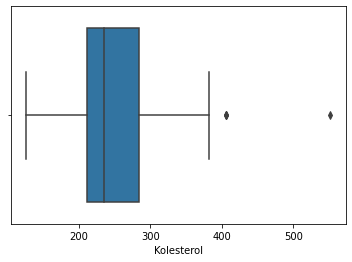

In [407]:
sns.boxplot(x=df.Kolesterol);

In [408]:
Q1 = df.Kolesterol.quantile(0.25)
Q3 = df.Kolesterol.quantile(0.75)
IQR = Q3 - Q1
altsinir = Q1 - 1.5 * IQR
ustsinir = Q3 + 1.5 * IQR

In [409]:
aykiri = df.Kolesterol < altsinir

In [410]:
df.Kolesterol[aykiri]

Series([], Name: Kolesterol, dtype: int64)

In [411]:
aykiri = df.Kolesterol > ustsinir

In [412]:
df.Kolesterol[aykiri]

28     406
85     552
220    406
246    406
Name: Kolesterol, dtype: int64

In [413]:
df.Kolesterol[aykiri] = int(df.Kolesterol.mean())

<ipython-input-413-51ee0f6b173f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Kolesterol[aykiri] = int(df.Kolesterol.mean())


In [414]:
df.Kolesterol[aykiri]

28     245
85     245
220    245
246    245
Name: Kolesterol, dtype: int64

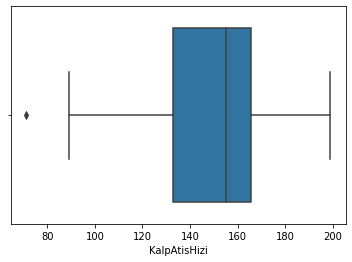

In [416]:
sns.boxplot(x=df.KalpAtisHizi);

In [417]:
Q1 = df.KalpAtisHizi.quantile(0.25)
Q3 = df.KalpAtisHizi.quantile(0.75)
IQR = Q3 - Q1
altsinir = Q1 - 1.5 * IQR
ustsinir = Q3 + 1.5 * IQR

In [418]:
aykiri = df.KalpAtisHizi > ustsinir

In [419]:
df.KalpAtisHizi[aykiri]

Series([], Name: KalpAtisHizi, dtype: int64)

In [420]:
aykiri = df.KalpAtisHizi < altsinir

In [421]:
df.KalpAtisHizi[aykiri]

272    71
Name: KalpAtisHizi, dtype: int64

In [422]:
df.KalpAtisHizi[aykiri] = int(df.KalpAtisHizi.mean())

<ipython-input-422-3a44f737dded>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.KalpAtisHizi[aykiri] = int(df.KalpAtisHizi.mean())


In [423]:
df.KalpAtisHizi[aykiri]

272    149
Name: KalpAtisHizi, dtype: int64

In [425]:
df.head()

,Yas,Cinsiyet,GogusAgrisi,KanBasinci,Kolesterol,KanSekeri,Elektrokardiyografik,KalpAtisHizi,KalpAgrisi,ST,Sonuc
0,63,1,3,144,235,1,0,147,0,2.3,1
1,35,1,2,132,260,0,1,184,0,3.5,1
2,41,0,1,132,211,0,0,169,0,1.4,1
3,54,1,1,120,235,0,1,177,0,0.9,1
4,57,0,0,120,357,0,1,162,1,0.5,1


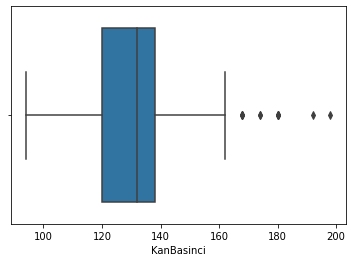

In [426]:
sns.boxplot(x=df.KanBasinci);

In [427]:
Q1 = df.KanBasinci.quantile(0.25)
Q3 = df.KanBasinci.quantile(0.75)
IQR = Q3 - Q1
altsinir = Q1 - 1.5 * IQR
ustsinir = Q3 + 1.5 * IQR

In [428]:
aykiri = df.KanBasinci < altsinir # boş

In [429]:
aykiri = df.KanBasinci > ustsinir

In [430]:
df.KanBasinci[aykiri]

8      174
101    180
110    180
152    168
195    168
203    180
223    198
228    168
241    174
248    192
260    180
266    180
292    168
Name: KanBasinci, dtype: int64

In [431]:
df.KanBasinci[aykiri] = int(df.KanBasinci.mean())

<ipython-input-431-a2c684581f98>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.KanBasinci[aykiri] = int(df.KanBasinci.mean())


In [432]:
df.KanBasinci[aykiri]

8      131
101    131
110    131
152    131
195    131
203    131
223    131
228    131
241    131
248    131
260    131
266    131
292    131
Name: KanBasinci, dtype: int64

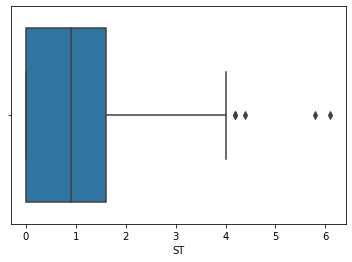

In [433]:
sns.boxplot(x=df.ST);

In [434]:
Q1 = df.ST.quantile(0.25)
Q3 = df.ST.quantile(0.75)
IQR = Q3 - Q1
altsinir = Q1 - 1.5 * IQR
ustsinir = Q3 + 1.5 * IQR

In [435]:
aykiri = df.ST < altsinir # boş

In [436]:
df.ST[aykiri]

Series([], Name: ST, dtype: float64)

In [437]:
aykiri = df.ST > ustsinir

In [438]:
df.ST[aykiri]

101    4.2
204    6.1
221    5.8
250    4.2
291    4.4
Name: ST, dtype: float64

In [439]:
df.ST[aykiri] = round(float(df.ST.mean()), 1)

<ipython-input-439-7882bb8a0c87>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.ST[aykiri] = round(float(df.ST.mean()), 1)


In [440]:
df.ST[aykiri]

101    1.0
204    1.0
221    1.0
250    1.0
291    1.0
Name: ST, dtype: float64

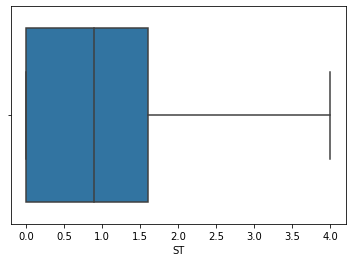

In [441]:
sns.boxplot(x=df.ST);

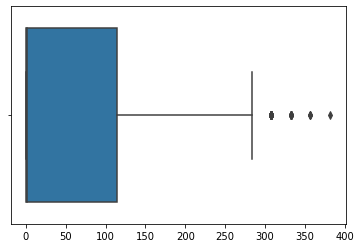

In [442]:
sns.boxplot(df);

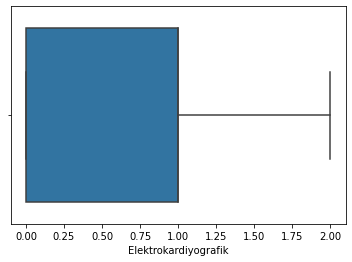

In [443]:
#sns.boxplot(x=df.GogusAgrisi);
sns.boxplot(x=df.Elektrokardiyografik);

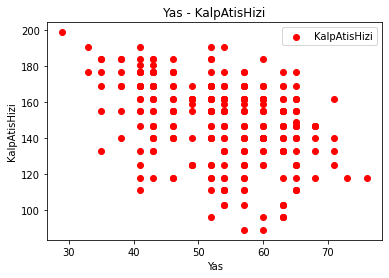

In [444]:
plt.scatter(x="Yas", y="KalpAtisHizi", color = "red" ,data = df)
plt.title('Yas - KalpAtisHizi')
plt.ylabel('KalpAtisHizi')
plt.xlabel('Yas')
plt.legend()
plt.show()

<AxesSubplot:xlabel='Yas', ylabel='GogusAgrisi'>

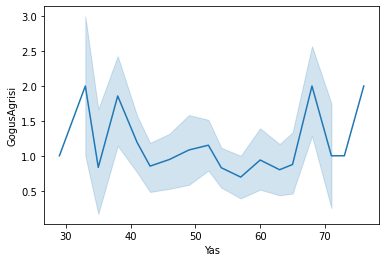

In [445]:
sns.lineplot(x="Yas", y="GogusAgrisi", data=df)

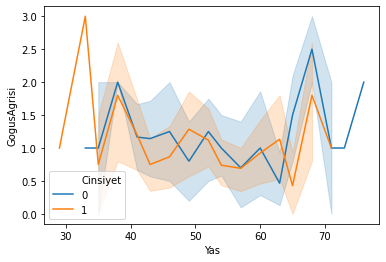

In [446]:
sns.lineplot(x="Yas", y="GogusAgrisi", hue="Cinsiyet", data=df);

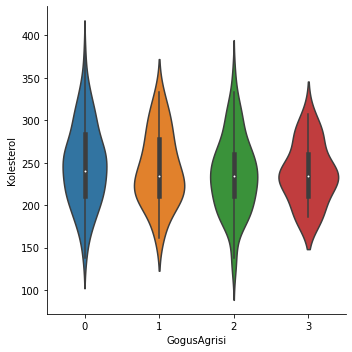

In [447]:
sns.catplot(x="GogusAgrisi", y="Kolesterol", kind="violin", data=df);

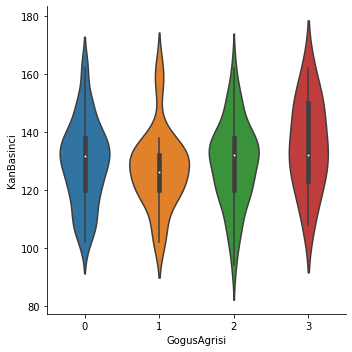

In [448]:
sns.catplot(x="GogusAgrisi", y="KanBasinci", kind="violin", data=df);

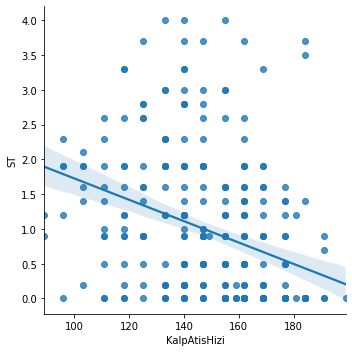

In [449]:
sns.lmplot(x="KalpAtisHizi", y="ST", data=df);

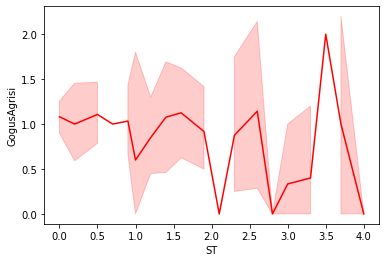

In [450]:
sns.lineplot(x="ST", y="GogusAgrisi",  data=df, color="red");

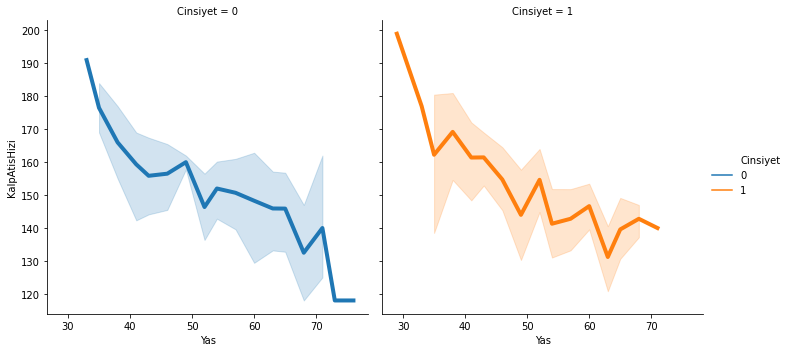

In [451]:
sns.relplot(
    data=df,
    x="Yas", y="KalpAtisHizi", col="Cinsiyet", hue="Cinsiyet",
    kind="line",linewidth=4, zorder=5,
  
); # 0 : Kadın, 1 : Erkek

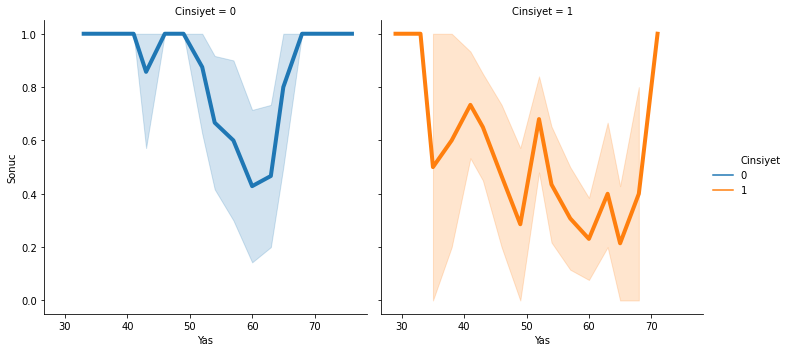

In [452]:
sns.relplot(
    data=df,
    x="Yas", y="Sonuc", col="Cinsiyet", hue="Cinsiyet",
    kind="line",linewidth=4, zorder=5,
  
);

In [453]:
df.head()

,Yas,Cinsiyet,GogusAgrisi,KanBasinci,Kolesterol,KanSekeri,Elektrokardiyografik,KalpAtisHizi,KalpAgrisi,ST,Sonuc
0,63,1,3,144,235,1,0,147,0,2.3,1
1,35,1,2,132,260,0,1,184,0,3.5,1
2,41,0,1,132,211,0,0,169,0,1.4,1
3,54,1,1,120,235,0,1,177,0,0.9,1
4,57,0,0,120,357,0,1,162,1,0.5,1


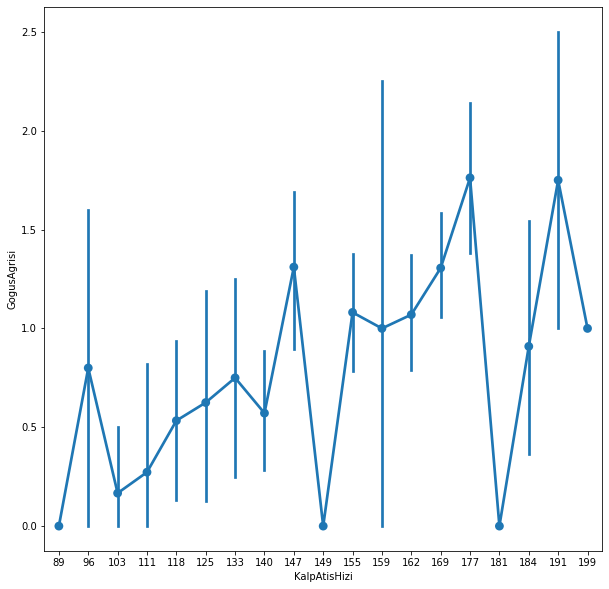

In [454]:
plt.figure(figsize=(10,10))
sns.pointplot(x="KalpAtisHizi", y="GogusAgrisi", data=df);

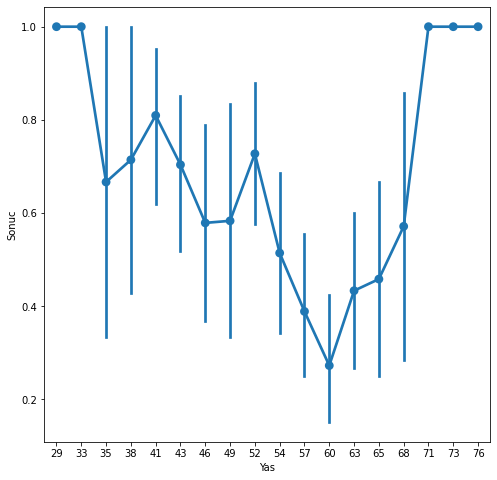

In [455]:
plt.figure(figsize=(8, 8))
sns.pointplot(x="Yas", y="Sonuc", data=df);

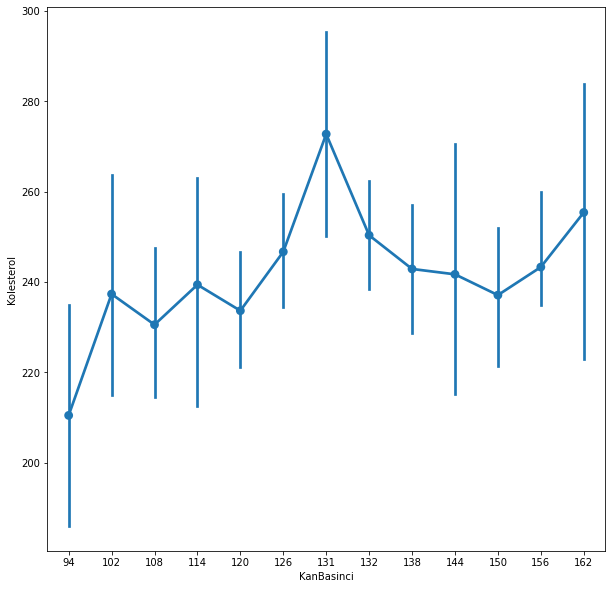

In [456]:
plt.figure(figsize=(10,10))
sns.pointplot(x="KanBasinci", y="Kolesterol", data=df);

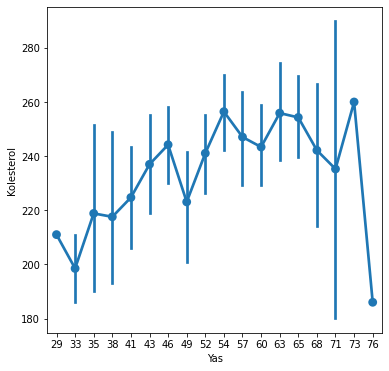

In [457]:
plt.figure(figsize=(6,6))
sns.pointplot(x="Yas", y="Kolesterol", data=df);

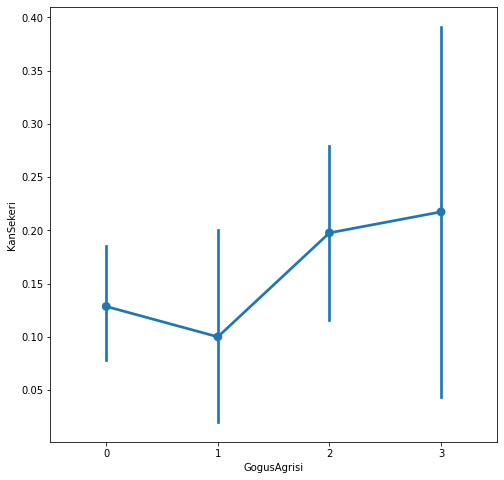

In [458]:
plt.figure(figsize=(8,8))
sns.pointplot(x="GogusAgrisi", y="KanSekeri", data=df);

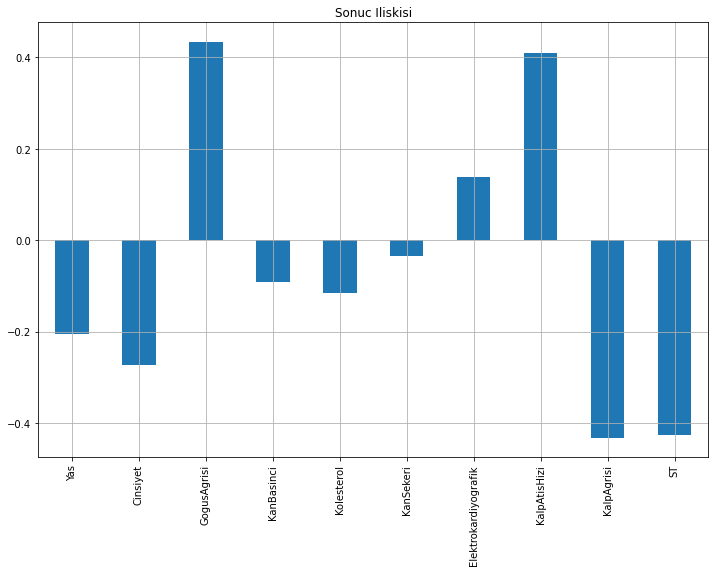

In [459]:
# splitting data - Hangi sutunlarin verileri 1 ve 0 tarafinda etkiledigini goruyoruz.
X = df.drop("Sonuc", axis =1)
Y = df["Sonuc"]
X.corrwith(df.Sonuc).plot(kind='bar',
                           grid=True, 
                           figsize=(12, 8),
                           title="Sonuc Iliskisi");

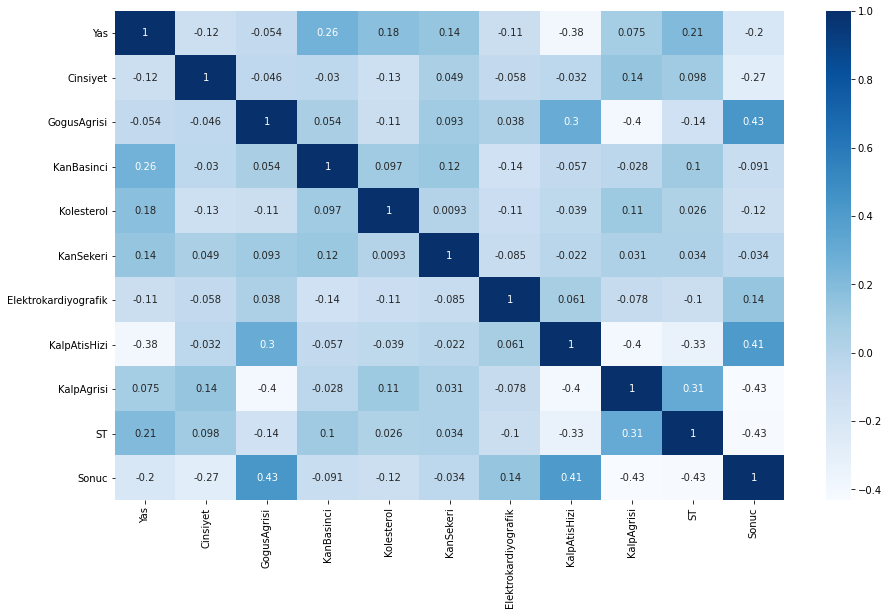

In [460]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),cmap='Blues',annot=True);

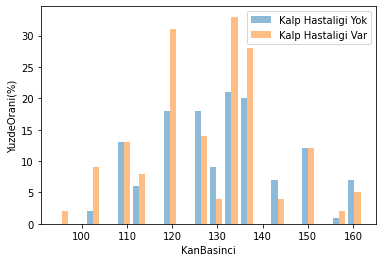

In [461]:
plt.hist([df[df.Sonuc==0].KanBasinci, df[df.Sonuc==1].KanBasinci], bins = 20, alpha = 0.5, label = ["Kalp Hastaligi Yok","Kalp Hastaligi Var"])
plt.xlabel("KanBasinci")
plt.ylabel("YuzdeOrani(%)")
plt.legend()
plt.show()

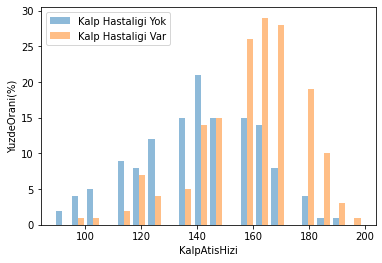

In [462]:
plt.hist([df[df.Sonuc==0].KalpAtisHizi, df[df.Sonuc==1].KalpAtisHizi], bins = 20, alpha = 0.5, label = ["Kalp Hastaligi Yok","Kalp Hastaligi Var"])
plt.xlabel("KalpAtisHizi")
plt.ylabel("YuzdeOrani(%)")
plt.legend()
plt.show()

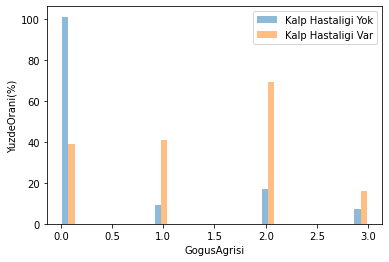

In [463]:
plt.hist([df[df.Sonuc==0].GogusAgrisi, df[df.Sonuc==1].GogusAgrisi], bins = 20, alpha = 0.5, label = ["Kalp Hastaligi Yok","Kalp Hastaligi Var"])
plt.xlabel("GogusAgrisi")
plt.ylabel("YuzdeOrani(%)")
plt.legend()
plt.show()

In [464]:
df.head()

,Yas,Cinsiyet,GogusAgrisi,KanBasinci,Kolesterol,KanSekeri,Elektrokardiyografik,KalpAtisHizi,KalpAgrisi,ST,Sonuc
0,63,1,3,144,235,1,0,147,0,2.3,1
1,35,1,2,132,260,0,1,184,0,3.5,1
2,41,0,1,132,211,0,0,169,0,1.4,1
3,54,1,1,120,235,0,1,177,0,0.9,1
4,57,0,0,120,357,0,1,162,1,0.5,1


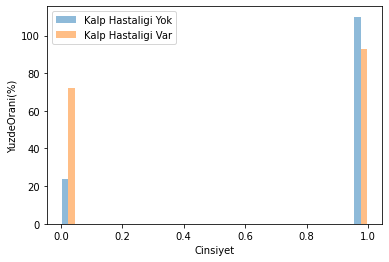

In [465]:
plt.hist([df[df.Sonuc==0].Cinsiyet, df[df.Sonuc==1].Cinsiyet], bins = 20, alpha = 0.5, label = ["Kalp Hastaligi Yok","Kalp Hastaligi Var"])
plt.xlabel("Cinsiyet")
plt.ylabel("YuzdeOrani(%)")
plt.legend()
plt.show()

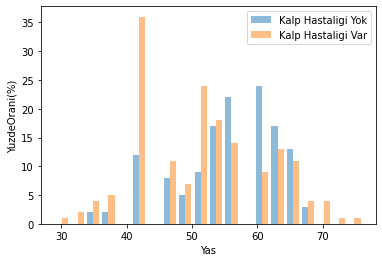

In [466]:
plt.hist([df[df.Sonuc==0].Yas, df[df.Sonuc==1].Yas], bins = 20, alpha = 0.5, label = ["Kalp Hastaligi Yok","Kalp Hastaligi Var"])
plt.xlabel("Yas")
plt.ylabel("YuzdeOrani(%)")
plt.legend()
plt.show()

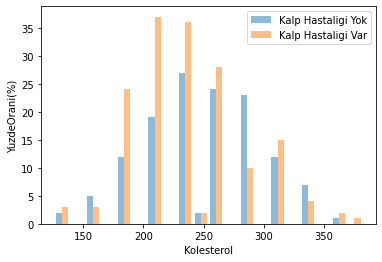

In [467]:
plt.hist([df[df.Sonuc==0].Kolesterol, df[df.Sonuc==1].Kolesterol], bins = 20, alpha = 0.5, label = ["Kalp Hastaligi Yok","Kalp Hastaligi Var"])
plt.xlabel("Kolesterol")
plt.ylabel("YuzdeOrani(%)")
plt.legend()
plt.show()

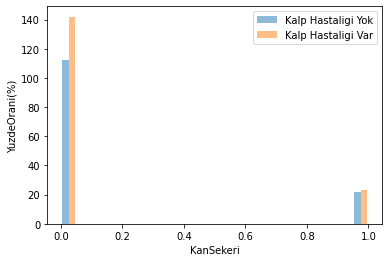

In [468]:
plt.hist([df[df.Sonuc==0].KanSekeri, df[df.Sonuc==1].KanSekeri], bins = 20, alpha = 0.5, label = ["Kalp Hastaligi Yok","Kalp Hastaligi Var"])
plt.xlabel("KanSekeri")
plt.ylabel("YuzdeOrani(%)")
plt.legend()
plt.show() # 0 : <120 , 1 : > 120

## Machine Learning

In [489]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, confusion_matrix

In [471]:
X = df.drop(["Sonuc"], axis = 1)
y = df.Sonuc

In [472]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 100)

In [474]:
lgbm_model = LGBMClassifier()

In [475]:
lgbm_params = {"learning_rate" : [0.001, 0.1, 0.01],
              "n_estimators" : [200, 500, 100, 800],
              "max_depth" : [1, 2, 3, 5, 8],
              "random_state" : np.arange(1,50,5),
              "boosting_type" : ["gbdt", "dart", "goss", "rf"],
              "max_leaves" : np.arange(1,40)}

In [479]:
lgbm_cv = GridSearchCV(lgbm_model, lgbm_params, cv = 3, verbose = 2, n_jobs = -1).fit(X_train, y_train)

Fitting 3 folds for each of 93600 candidates, totalling 280800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 1100 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 2232 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done 3692 tasks      | elapsed:   46.3s
[Parallel(n_jobs=-1)]: Done 5472 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 7580 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 10008 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 12764 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 15840 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 19244 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 22968 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 27020 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 31392 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 36092 tas

In [480]:
lgbm_cv.best_params_

{'boosting_type': 'goss',
 'learning_rate': 0.1,
 'max_depth': 1,
 'max_leaves': 1,
 'n_estimators': 200,
 'random_state': 31}

In [481]:
tuned = LGBMClassifier(learning_rate = 0.1, max_depth = 1, n_estimators = 200, random_state = 31, boosting_type = "goss", max_leaves = 1).fit(X_train, y_train)

In [482]:
y_pred = tuned.predict(X_test)

In [483]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.46188021535170065

In [485]:
tuned.predict(X_test)[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [486]:
print(y_test[0:5])

221    0
139    1
237    0
175    0
231    0
Name: Sonuc, dtype: int64


In [487]:
print("Train score : ", tuned.score(X_train, y_train))
print("\nTest score : ", tuned.score(X_test, y_test))

Train score :  0.8392857142857143

Test score :  0.7866666666666666


In [490]:
confusion_matrix(y_test, y_pred)

array([[28, 11],
       [ 5, 31]], dtype=int64)